In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv("kr_daily.csv")

In [21]:
data.head()

,date,confirmed,death,released,tested,negative
0,20200121,1,0,0,1,0
1,20200122,1,0,0,1,0
2,20200123,1,0,0,1,0
3,20200124,2,0,0,2,0
4,20200125,2,0,0,2,0


In [22]:
temp=data[['date',"confirmed"]]

In [23]:
temp["date"].values

array([20200121, 20200122, 20200123, 20200124, 20200125, 20200126,
       20200127, 20200128, 20200129, 20200130, 20200131, 20200201,
       20200202, 20200203, 20200204, 20200205, 20200206, 20200207,
       20200208, 20200209, 20200210, 20200211, 20200212, 20200213,
       20200214, 20200215, 20200216, 20200217, 20200218, 20200219,
       20200220, 20200221, 20200222, 20200223, 20200224, 20200225,
       20200226, 20200227, 20200228, 20200229, 20200301, 20200302,
       20200303, 20200304, 20200305, 20200306, 20200307, 20200308,
       20200309, 20200310, 20200311, 20200312, 20200313, 20200314,
       20200315, 20200316, 20200317, 20200318, 20200319, 20200320,
       20200321, 20200322, 20200323, 20200324, 20200325, 20200326,
       20200327, 20200328, 20200329, 20200330, 20200331, 20200401,
       20200402, 20200403, 20200404, 20200405, 20200406, 20200407,
       20200408, 20200409, 20200410, 20200411, 20200412, 20200413,
       20200414, 20200415, 20200416, 20200417, 20200418, 20200

In [24]:
temp.groupby("date").count()

,confirmed
date,
20200121,1
20200122,1
20200123,1
20200124,1
20200125,1
...,...
20201104,1
20201105,1
20201106,1


In [25]:
data['confirmed'].values

array([    1,     1,     1,     2,     2,     2,     4,     4,     4,
           7,    11,    12,    15,    15,    16,    21,    24,    24,
          24,    27,    27,    28,    28,    28,    28,    28,    29,
          30,    39,    46,   104,   204,   433,   608,   843,   977,
        1261,  1766,  2337,  3150,  3736,  4212,  4812,  5328,  5766,
        6284,  6767,  7134,  7382,  7513,  7755,  7869,  7979,  8086,
        8162,  8236,  8320,  8413,  8565,  8652,  8799,  8897,  8961,
        9037,  9137,  9241,  9332,  9478,  9583,  9661,  9786,  9887,
        9976, 10062, 10156, 10237, 10284, 10331, 10384, 10423, 10450,
       10480, 10512, 10537, 10564, 10591, 10613, 10635, 10653, 10661,
       10674, 10683, 10694, 10702, 10708, 10718, 10728, 10738, 10752,
       10761, 10765, 10774, 10780, 10793, 10801, 10804, 10806, 10810,
       10822, 10840, 10874, 10909, 10936, 10962, 10991, 11018, 11037,
       11050, 11065, 11078, 11110, 11122, 11142, 11165, 11190, 11206,
       11225, 11265,

In [26]:
months=[31,28,31,30,31,30,31,31,30,31]

In [27]:
mm=[]
for i in range(len(temp)):
    month=int(str(temp["date"][i])[5])
    ttemp=int(str(temp["date"][i])[6:])/months[month-1]+month
    mm.append(ttemp)
temp['month']=mm

<ipython-input-27-ceb871613e4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['month']=mm


In [28]:
daily=[1]
for i in range(1,len(temp)):
    ttemp=temp["confirmed"][i]-temp["confirmed"][i-1]
    daily.append(ttemp)
temp['daily']=daily

<ipython-input-28-55ee2794b0d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['daily']=daily


In [29]:
str(temp["date"][1])[:4]+'-'+str(temp["date"][1])[4:6]+'-'+str(temp["date"][1])[6:]

'2020-01-22'

In [30]:
temp['daily'].values

array([  1,   0,   0,   1,   0,   0,   2,   0,   0,   3,   4,   1,   3,
         0,   1,   5,   3,   0,   0,   3,   0,   1,   0,   0,   0,   0,
         1,   1,   9,   7,  58, 100, 229, 175, 235, 134, 284, 505, 571,
       813, 586, 476, 600, 516, 438, 518, 483, 367, 248, 131, 242, 114,
       110, 107,  76,  74,  84,  93, 152,  87, 147,  98,  64,  76, 100,
       104,  91, 146, 105,  78, 125, 101,  89,  86,  94,  81,  47,  47,
        53,  39,  27,  30,  32,  25,  27,  27,  22,  22,  18,   8,  13,
         9,  11,   8,   6,  10,  10,  10,  14,   9,   4,   9,   6,  13,
         8,   3,   2,   4,  12,  18,  34,  35,  27,  26,  29,  27,  19,
        13,  15,  13,  32,  12,  20,  23,  25,  16,  19,  40,  79,  58,
        39,  27,  35,  38,  49,  39,  39,  51,  57,  38,  38,  50,  45,
        56,  48,  33,  37,  34,  43,  59,  49,  67,  48,  17,  46,  51,
        28,  39,  51,  62,  42,  42,  51,  54,  63,  63,  61,  46,  44,
        63,  49,  45,  35,  44,  62,  33,  39,  61,  60,  39,  3

In [11]:
dates=[]
for i in range(0,len(data)):
    temp=str(data["date"][i])[:4]+'-'+str(data["date"][i])[4:6]+'-'+str(data["date"][i])[6:]
    dates.append(temp)
data["dates"]=dates

In [12]:
data["dates"].values

array(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-

In [9]:
temp.head()

,date,confirmed,month,daily
0,20200121,1,1.677419,1
1,20200122,1,1.709677,0
2,20200123,1,1.741935,0
3,20200124,2,1.774194,1
4,20200125,2,1.806452,0


Text(0.5, 1.0, 'Corona Virus')

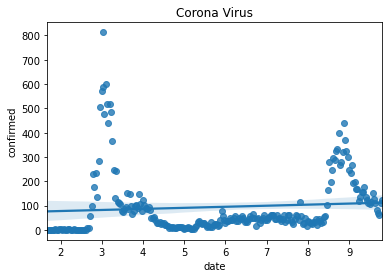

In [10]:
#ax=sns.lineplot(data = temp['confirmed'], time = temp['date'])
ax=sns.regplot(x="month",y="daily",data=temp)
ax.set_xlabel("date")
ax.set_ylabel("confirmed")
ax.set_title("Corona Virus")

In [39]:
bh=pd.read_csv("baek.csv",encoding='cp949')

In [40]:
bh
name=bh["품목별(2)"][1:]
name[1]="총계 소계"
name[2]="비식품 소계"
name[10]="식품 소계"
name

1       총계 소계
2      비식품 소계
3          잡화
4        여성정장
5       여성캐주얼
6        남성의류
7      아동/스포츠
8        가정용품
9     해외유명브랜드
10      식품 소계
Name: 품목별(2), dtype: object

In [41]:
ttemp=bh[["2020. 04","2020. 05"]][1:]
ttemp=ttemp.astype('float')
ttemp.index=name

In [48]:
ttemp.index.values

array(['총계 소계', '비식품 소계', '잡화', '여성정장', '여성캐주얼', '남성의류', '아동/스포츠', '가정용품',
       '해외유명브랜드', '식품 소계'], dtype=object)

Text(0, 0.5, '품목')

C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from c

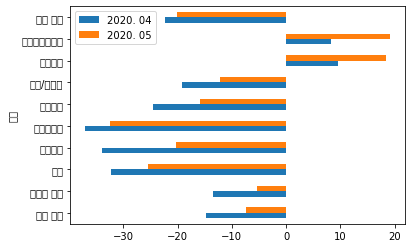

In [15]:
ax=ttemp.plot(kind='barh')
ax.set_ylabel("품목")

In [16]:
dae=pd.read_csv("dae.csv",encoding='cp949')

In [17]:
dae
name=dae["품목별(2)"][1:]
name[1]="총계 소계"
name[2]="비식품 소계"
name[8]="식품 소계"
name

1     총계 소계
2    비식품 소계
3      가전문화
4        의류
5      가정생활
6       스포츠
7        잡화
8     식품 소계
Name: 품목별(2), dtype: object

In [18]:
ttemp=dae[["2020. 04","2020. 05"]][1:]
ttemp=ttemp.astype('float')
ttemp.index=name

In [19]:
dae

,품목별(1),품목별(2),2020. 03,2020. 03.1,2020. 04,2020. 05
0,품목별(1),품목별(2),전월대비 매출증감률 (%),전년동월대비 매출증감률 (%),전년동월대비 매출증감률 (%),전년동월대비 매출증감률 (%)
1,총계,총계 소계,4.8,-13.8,-1,-9.7
2,비식품,비식품 소계,2.9,-29.3,-11.3,-9.9
3,비식품,가전문화,11.3,-23.6,1.4,1.3
4,비식품,의류,9,-50.6,-33.6,-28.4
5,비식품,가정생활,-1.9,-20,-7.1,-11
6,비식품,스포츠,11.8,-41.4,-15.2,-12.9
7,비식품,잡화,-11.7,-56.1,-34.8,-14.3
8,식품,식품 소계,6.2,-3.3,5.9,-9.1


In [20]:
ttemp

,2020. 04,2020. 05
품목별(2),,
총계 소계,-1.0,-9.7
비식품 소계,-11.3,-9.9
가전문화,1.4,1.3
의류,-33.6,-28.4
가정생활,-7.1,-11.0
스포츠,-15.2,-12.9
잡화,-34.8,-14.3
식품 소계,5.9,-9.1


Text(0, 0.5, '품목')

C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yurik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from c

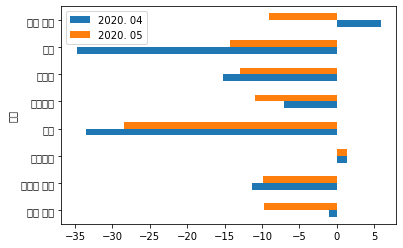

In [21]:
ax=ttemp.plot(kind='barh')
ax.set_ylabel("품목")

In [49]:
online=pd.read_excel("online.xlsx")

In [50]:
online

,name,april,may
0,온라인,12.5,13.1
1,음식서비스,83.7,77.5
2,음∙식료품,43.6,33.1
3,생활용품,36.0,38.0
4,가전∙전자∙통신기기,19.0,20.9
5,농축수산물,69.6,54.3
6,컴퓨터 및 주변기기,37.9,35.0
7,가구,42.7,41.3
8,스포츠∙레저용품,21.8,21.3
9,아동∙유아용품,17.0,20.2


In [51]:
name=online["name"][1:]
name[1]="온라인 소계"
name

1          온라인 소계
2           음∙식료품
3            생활용품
4      가전∙전자∙통신기기
5           농축수산물
6      컴퓨터 및 주변기기
7              가구
8        스포츠∙레저용품
9         아동∙유아용품
10             서적
11          사무∙문구
12            화장품
13             의복
14             가방
15    패션용품 및 액세서리
16     문화 및 레저서비스
17     여행 및 교통서비스
Name: name, dtype: object

In [52]:
ttemp=online[["april","may"]][1:]
ttemp=ttemp.astype('float')
ttemp.index=name

In [55]:
online["name"].values

array(['온라인', '온라인 소계', '음∙식료품', '생활용품', '가전∙전자∙통신기기', '농축수산물',
       '컴퓨터 및 주변기기', '가구', '스포츠∙레저용품', '아동∙유아용품', '서적', '사무∙문구', '화장품',
       '의복', '가방', '패션용품 및 액세서리', '문화 및 레저서비스', '여행 및 교통서비스'],
      dtype=object)

In [57]:
online["may"].values

array([ 13.1,  77.5,  33.1,  38. ,  20.9,  54.3,  35. ,  41.3,  21.3,
        20.2,  30.5,  12.8,  -5.4,   8.2,  -0.7, -17. , -72.1, -61.6])